In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field
from dotenv import load_dotenv
import os
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.checkpoint.memory import MemorySaver
import operator

c:\Users\Nitro\Desktop\Desk\CampusX\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatGroq(
    model=os.getenv("model"),
    api_key=os.getenv("api_key")
)
def chatModel(state : ChatState):
    message = state["messages"]
    response = llm.invoke(message)
    return {'messages' : [response]}


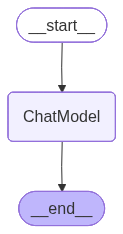

In [4]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("ChatModel", chatModel)
graph.add_edge(START, "ChatModel")
graph.add_edge("ChatModel", END)

workflow = graph.compile(checkpointer=checkpointer)
workflow


In [5]:
config = {'configurable' : {'thread_id' : 1}}
intial = {'messages' : [(HumanMessage(content='What is pytorch?'))]}
workflow.invoke(intial, config=config)

{'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='a57f1d5e-2bdb-408f-849c-30ae488d8c20'),
  AIMessage(content='PyTorch is an open‑source machine‑learning library developed by Meta (formerly Facebook) that provides tools for building and training deep neural networks. It combines:\n\n* **Tensor computation** – a flexible, GPU‑accelerated array (tensor) library with automatic differentiation (the “autograd” system) that tracks operations to compute gradients for back‑propagation.\n* **Dynamic computation graphs** – unlike static‑graph frameworks, PyTorch builds the graph on the fly as you execute code, making debugging and model development more intuitive.\n* **High‑level APIs** – modules such as `torch.nn` for defining layers, `torch.optim` for optimization algorithms, and utilities for data loading (`torch.utils.data`) and model serialization.\n* **Ecosystem** – extensions like TorchVision (vision), TorchText (NLP), TorchAudio (audio

In [6]:
thread_id1 = 1
thread_id2 = 2
while True:
    query = input("type here")

    if query.strip().lower() in ["exit", "bye", "quit"]:
        break
    else:
        config = {'configurable' : {'thread_id' : thread_id1}}
        print("User: ",query)
        print("AI: ",workflow.invoke({"messages" : [HumanMessage(content=query)]}, config=config)['messages'][-1].content)
        

User:  tell me more about it
AI:  ### PyTorch – A Deeper Look  

| Aspect | What It Is | Why It Matters |
|--------|------------|----------------|
| **Origin & Governance** | Launched in 2016 by Facebook AI Research (FAIR). Now an open‑source project under the **PyTorch Foundation** (Linux Foundation) with contributions from academia, industry, and the community. | Guarantees long‑term support, transparent governance, and a vibrant ecosystem. |
| **Core Data Structure – Tensor** | Multi‑dimensional array (like NumPy) that can live on CPU **or** GPU (CUDA, AMD ROCm, Apple Metal). Supports sparse tensors, complex numbers, and quantized types. | Enables high‑performance numerical computing and seamless GPU acceleration. |
| **Autograd (Automatic Differentiation)** | Records every operation on tensors in a **dynamic computation graph**. When `loss.backward()` is called, it traverses the graph backward to compute gradients automatically. | Eliminates manual derivative coding, making researc

In [7]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='a57f1d5e-2bdb-408f-849c-30ae488d8c20'), AIMessage(content='PyTorch is an open‑source machine‑learning library developed by Meta (formerly Facebook) that provides tools for building and training deep neural networks. It combines:\n\n* **Tensor computation** – a flexible, GPU‑accelerated array (tensor) library with automatic differentiation (the “autograd” system) that tracks operations to compute gradients for back‑propagation.\n* **Dynamic computation graphs** – unlike static‑graph frameworks, PyTorch builds the graph on the fly as you execute code, making debugging and model development more intuitive.\n* **High‑level APIs** – modules such as `torch.nn` for defining layers, `torch.optim` for optimization algorithms, and utilities for data loading (`torch.utils.data`) and model serialization.\n* **Ecosystem** – extensions like TorchVision (vision), TorchText (NLP)